# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Your code here
boston=pd.read_csv(r'/Users/abdulrahmanalabdali/Desktop/boston_data.csv')
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7


In [8]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [9]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [10]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.194770,0.404249,-0.060688,0.405290,-0.172226,0.349288,-0.376493,0.603044,0.565047,0.292092,-0.377436,0.428940,-0.400956
zn,-0.194770,1.000000,-0.532268,-0.037290,-0.497114,0.302404,-0.546587,0.659018,-0.311313,-0.289332,-0.371315,0.176350,-0.412075,0.355608
indus,0.404249,-0.532268,1.000000,0.059928,0.760913,-0.353589,0.630048,-0.702583,0.616375,0.722828,0.356549,-0.378189,0.608309,-0.501698
chas,-0.060688,-0.037290,0.059928,1.000000,0.100650,0.090146,0.084852,-0.103124,-0.022561,-0.043708,-0.121835,0.042580,-0.041061,0.141400
nox,0.405290,-0.497114,0.760913,0.100650,1.000000,-0.266114,0.728882,-0.762469,0.612115,0.660607,0.166715,-0.393876,0.587573,-0.439225
rm,-0.172226,0.302404,-0.353589,0.090146,-0.266114,1.000000,-0.210589,0.178700,-0.173222,-0.241733,-0.323330,0.128410,-0.578025,0.683541
age,0.349288,-0.546587,0.630048,0.084852,0.728882,-0.210589,1.000000,-0.734915,0.467341,0.503830,0.231820,-0.276469,0.602001,-0.390863
dis,-0.376493,0.659018,-0.702583,-0.103124,-0.762469,0.178700,-0.734915,1.000000,-0.503471,-0.526938,-0.206016,0.306445,-0.500912,0.264876
rad,0.603044,-0.311313,0.616375,-0.022561,0.612115,-0.173222,0.467341,-0.503471,1.000000,0.917344,0.487733,-0.468700,0.499279,-0.423508
tax,0.565047,-0.289332,0.722828,-0.043708,0.660607,-0.241733,0.503830,-0.526938,0.917344,1.000000,0.465997,-0.462250,0.542732,-0.495792


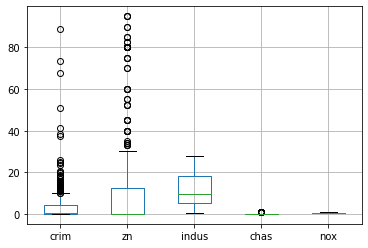

In [11]:
boxplot = boston.boxplot(column=['crim', 'zn', 'indus', 'chas','nox'])  

In [12]:
boston.drop(boston.loc[boston['crim']>60].index, inplace=True)

In [13]:
boston.drop(boston.loc[boston['zn']>60].index, inplace=True)

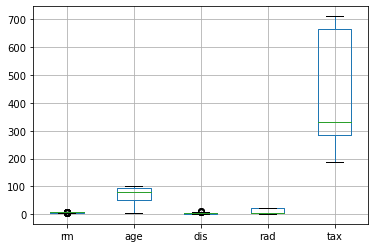

In [14]:
boxplot = boston.boxplot(column=['rm', 'age', 'dis', 'rad','tax']) 

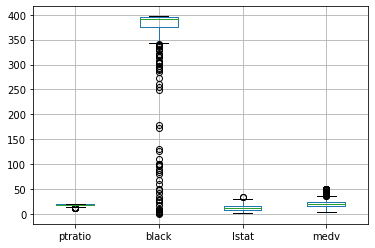

In [15]:
boxplot = boston.boxplot(column=['ptratio', 'black', 'lstat', 'medv'])  

### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [16]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.233478,0.478695,-0.068055,0.476199,-0.229627,0.397629,-0.450347,0.721977,0.678801,0.345894,-0.463438,0.511877,-0.438714
zn,-0.233478,1.000000,-0.484703,-0.034018,-0.442262,0.249503,-0.465326,0.590514,-0.273697,-0.300385,-0.344408,0.175785,-0.356824,0.282851
indus,0.478695,-0.484703,1.000000,0.059039,0.732373,-0.318896,0.580234,-0.672879,0.593995,0.724273,0.313180,-0.371116,0.572424,-0.468928
chas,-0.068055,-0.034018,0.059039,1.000000,0.102404,0.085335,0.086069,-0.100411,-0.023186,-0.039572,-0.125185,0.044358,-0.045591,0.135604
nox,0.476199,-0.442262,0.732373,0.102404,1.000000,-0.226343,0.696429,-0.750775,0.588627,0.655513,0.100906,-0.387127,0.551188,-0.403391
rm,-0.229627,0.249503,-0.318896,0.085335,-0.226343,1.000000,-0.154048,0.142755,-0.144869,-0.219236,-0.260968,0.113255,-0.562178,0.656931
age,0.397629,-0.465326,0.580234,0.086069,0.696429,-0.154048,1.000000,-0.709532,0.431805,0.489180,0.174872,-0.260581,0.560703,-0.338115
dis,-0.450347,0.590514,-0.672879,-0.100411,-0.750775,0.142755,-0.709532,1.000000,-0.485869,-0.537772,-0.154357,0.308360,-0.462872,0.221977
rad,0.721977,-0.273697,0.593995,-0.023186,0.588627,-0.144869,0.431805,-0.485869,1.000000,0.919593,0.482133,-0.462683,0.471044,-0.398026
tax,0.678801,-0.300385,0.724273,-0.039572,0.655513,-0.219236,0.489180,-0.537772,0.919593,1.000000,0.466110,-0.458695,0.522945,-0.478092


In [17]:
#considering medv as the price
#in this case I will take variables with .70 corr or higher, variables chosen are (tax, rad, crim, nox, indus,age)

In [18]:
import seaborn as sns

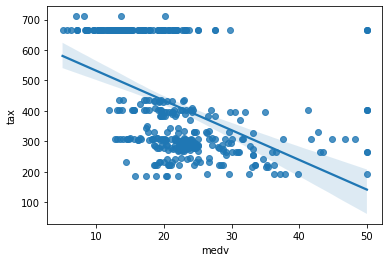

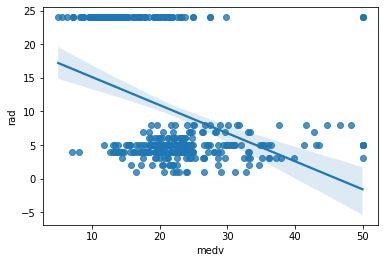

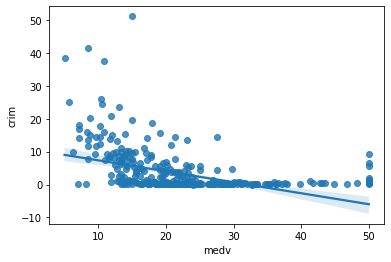

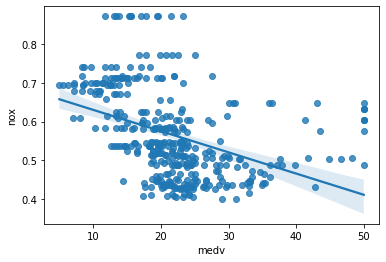

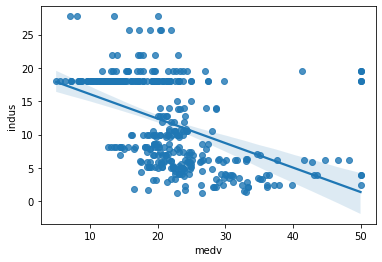

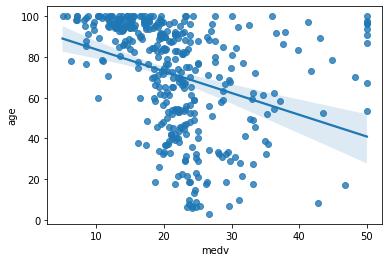

In [19]:
# Your plots here
for x in ['tax', 'rad', 'crim', 'nox','indus','age']:
    sns.regplot(x='medv', y=x, data=boston)
    plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [20]:
# Your response here
# if the medv increases the variables increase

In [21]:
import numpy as np

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

<AxesSubplot:>

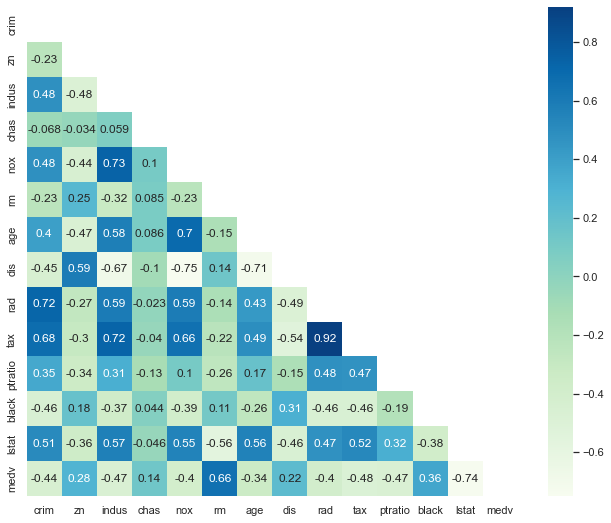

In [22]:
# Your response here
sns.set_theme(style="white")
corr = boston.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap='GnBu', annot=True)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [23]:
# Your code here
boston['medv'].describe()

count    377.000000
mean      21.894164
std        8.481552
min        5.000000
25%       16.700000
50%       21.200000
75%       24.600000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [24]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    result = r2_score(y_true, y_predict)
    return result
    

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [25]:
# Your code here
from sklearn.model_selection import train_test_split


y = boston['medv']
x = boston.drop(labels='medv', axis=1)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state = 15)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [26]:
from sklearn.ensemble import RandomForestRegressor

max_depth = [2,4,6,8,10]

y_predictions_train={}
y_predictions_test={}

for num in max_depth:
    rfr = RandomForestRegressor(max_depth=num)
    rfr.fit(x_train, y_train)
    key = 'rfr_depth' + str(num)
    y_predictions_train[key]= rfr.predict(x_train)
    y_predictions_test[key]= rfr.predict(x_test)

Now, plot the score for each tree on the training set and on the testing set.

In [27]:
trains_scores = []
for key in y_predictions_train:
    trains_scores.append(performance_metric(y_true=y_train, y_predict=y_predictions_train[key]))

test_scores = []
for key in y_predictions_test:
    test_scores.append(performance_metric(y_true=y_test, y_predict=y_predictions_test[key]))

In [28]:
# Produce a plot with the score for the testing and training for the different max depths
df_score = pd.DataFrame({'train': trains_scores, 'test': test_scores}, index=max_depth)

<AxesSubplot:>

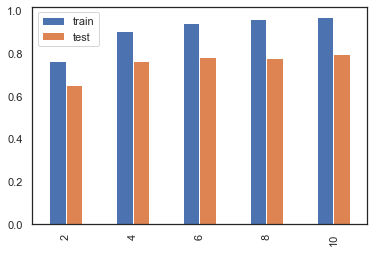

In [29]:
df_score.plot.bar()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [30]:
# Your response here
# r2 increases train sample increases,r2 for test sample stops increasing after reaching 0.8

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

<AxesSubplot:>

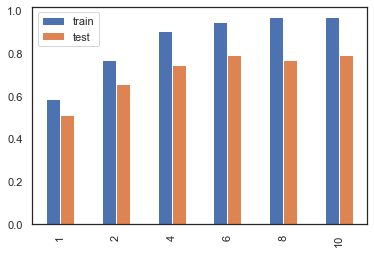

In [31]:
# Your response here
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

max_depth = [1,2,4,6,8,10]

y_predictions_train={}
y_predictions_test={}

for num in max_depth:
    rfr = RandomForestRegressor(max_depth=num)
    rfr.fit(x_train, y_train)
    key = 'rfr_depth' + str(num)
    y_predictions_train[key]= rfr.predict(x_train)
    y_predictions_test[key]= rfr.predict(x_test)

trains_scores = []
for key in y_predictions_train:
    trains_scores.append(performance_metric(y_true=y_train, y_predict=y_predictions_train[key]))

test_scores = []
for key in y_predictions_test:
    test_scores.append(performance_metric(y_true=y_test, y_predict=y_predictions_test[key]))

df_score = pd.DataFrame({'train': trains_scores, 'test': test_scores}, index=max_depth)
df_score.plot.bar()

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [37]:
# Your response here
#max_depth between 8 and 10

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [38]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,0.10084,0.0,10.01,0.0,0.547,6.715,81.6,2.6775,6.0,432.0,17.8,395.59,10.16,22.8
398,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81,16.6
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0


In [39]:
# Your response here
#1 Data is old and is not relevant to today's prices especially is a city like Boston
#Additional modern features could be added to add value 
#No
#No